# CNN

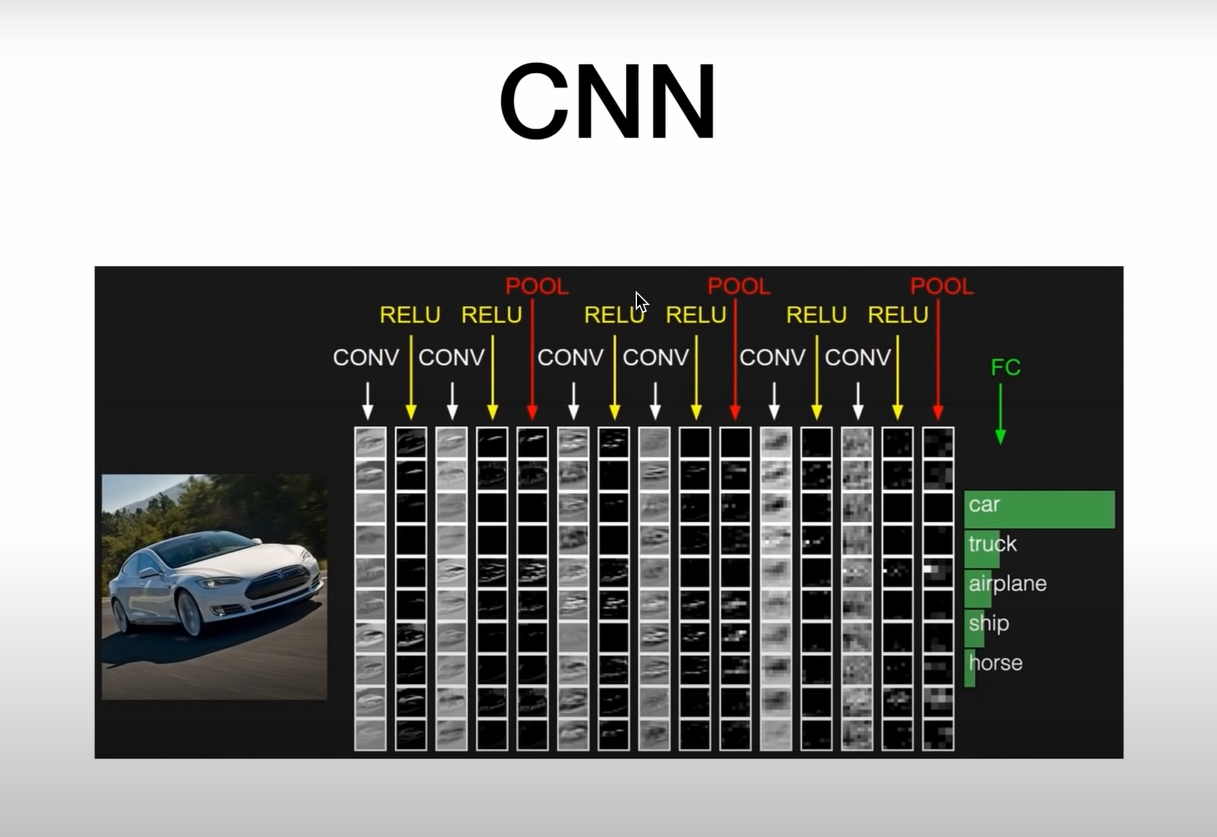

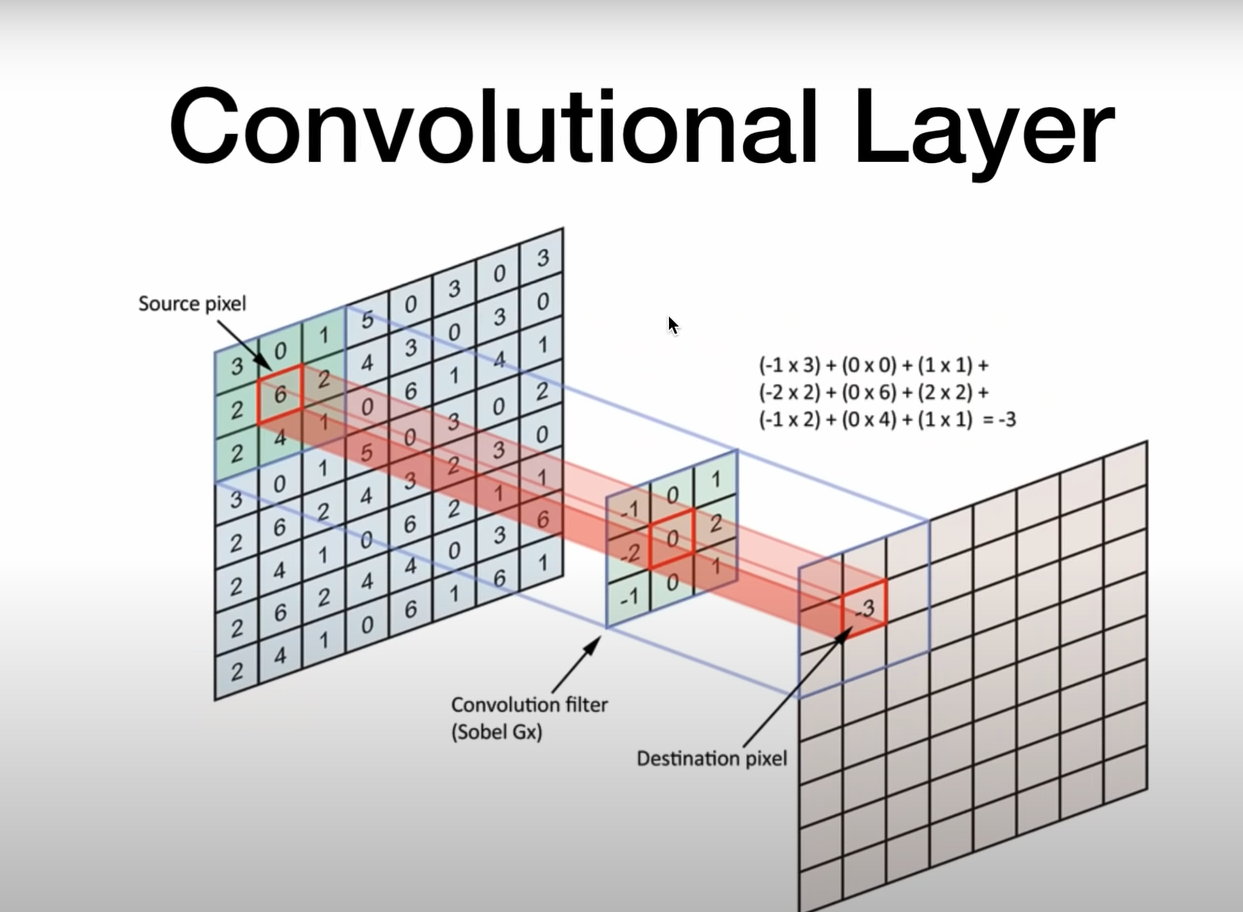

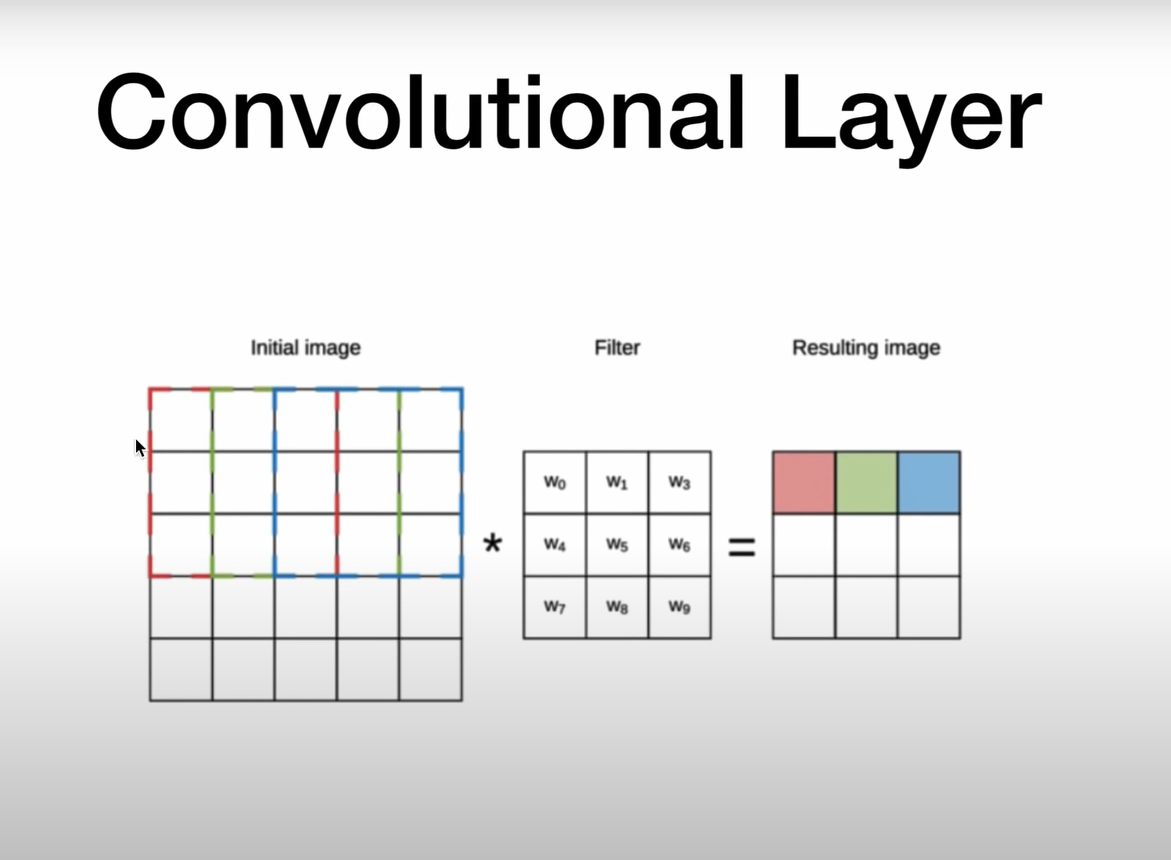

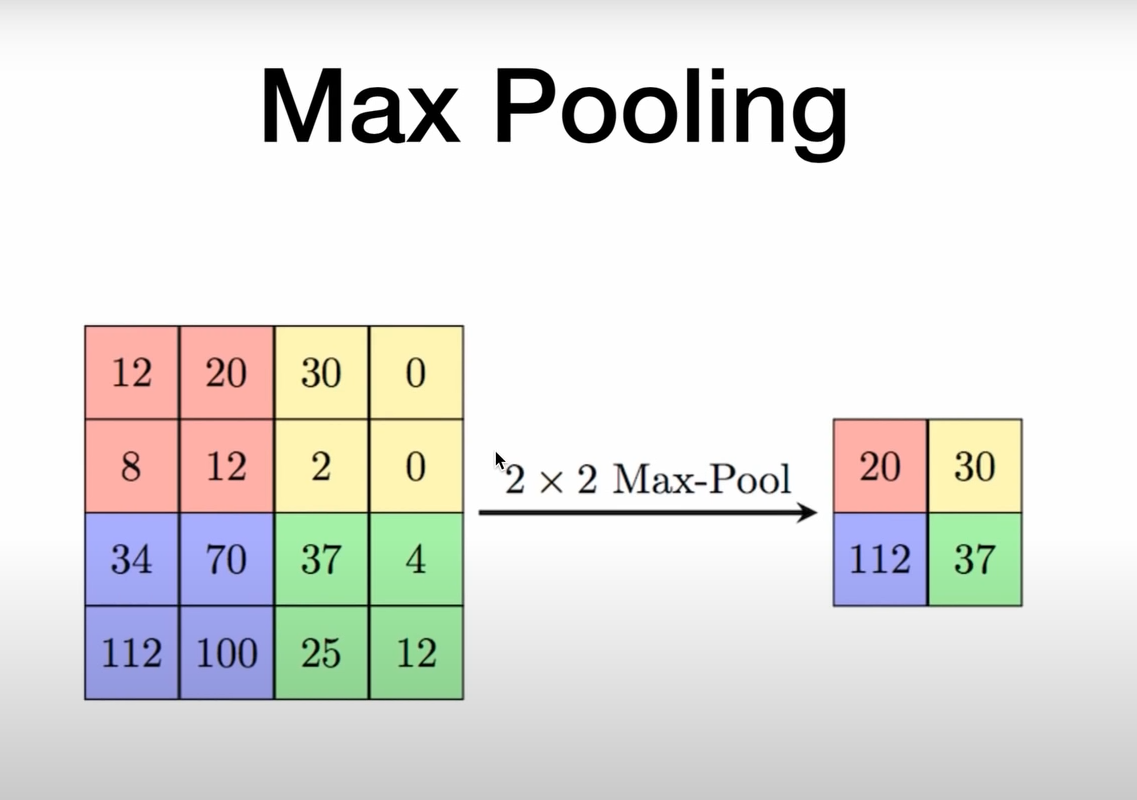

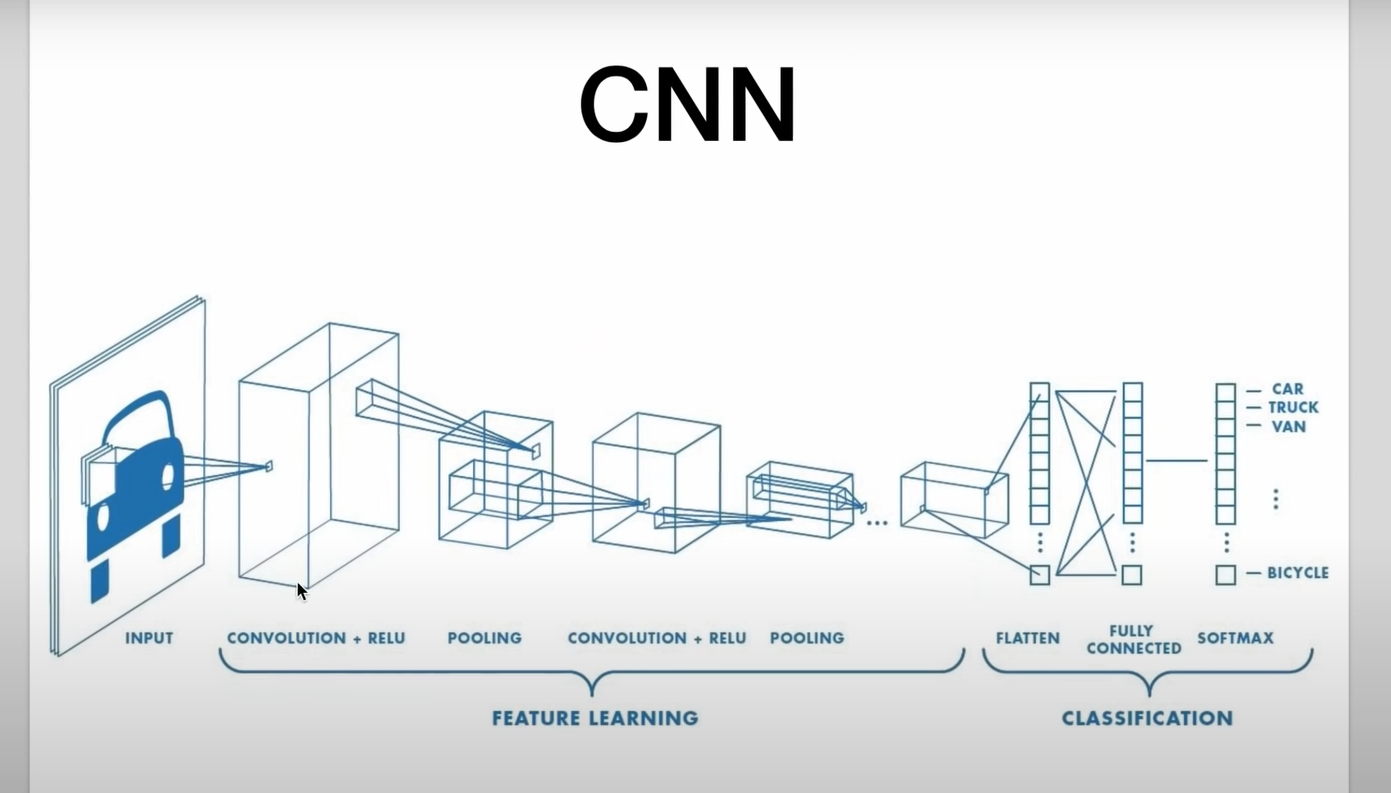

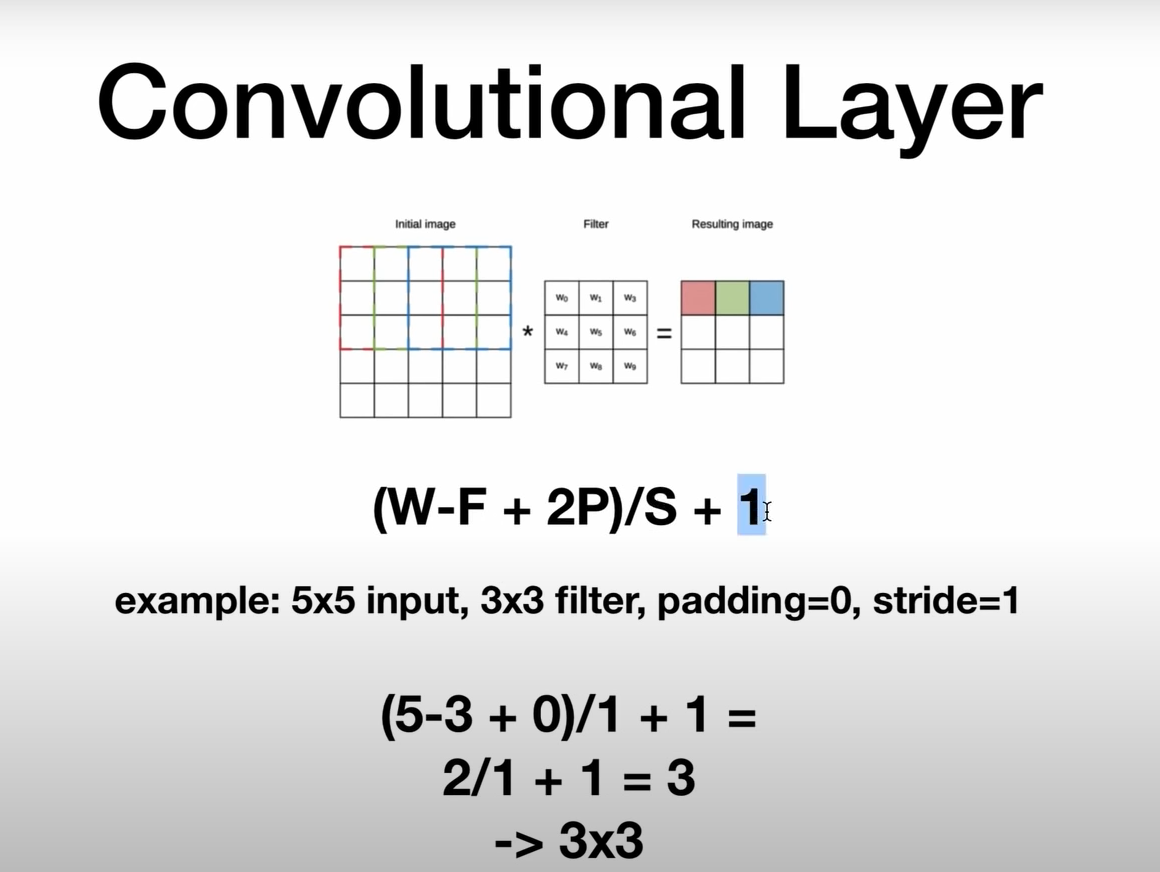

In [1]:
#W=5, F=3,P=0 (padding),S=1 (jump)
def size_after_cov(W,F,P,S):
  return (W-F+2*P)/S+1
size_after_cov(W=5, F=3,P=0,S=1)

3.0

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


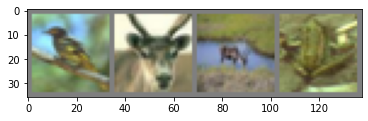

In [4]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [14]:
labels

tensor([3, 5, 1, 7], device='cuda:0')

In [5]:
# Primera imagen con 3 canales
images[0]

tensor([[[ 0.2627,  0.2392,  0.2000,  ...,  0.0431,  0.0667,  0.1137],
         [ 0.2235,  0.1608,  0.1216,  ...,  0.0118,  0.0667,  0.1608],
         [ 0.1294,  0.0667,  0.0353,  ...,  0.0118,  0.0667,  0.1373],
         ...,
         [ 0.0118,  0.0118, -0.0039,  ...,  0.2392,  0.0510, -0.0745],
         [ 0.0039, -0.0039, -0.0431,  ...,  0.0824,  0.0745, -0.0667],
         [-0.0510, -0.0353, -0.0431,  ..., -0.1843, -0.1373, -0.1216]],

        [[ 0.7176,  0.6941,  0.6471,  ...,  0.0902,  0.1765,  0.2863],
         [ 0.6471,  0.5529,  0.4980,  ...,  0.0667,  0.2078,  0.3804],
         [ 0.5216,  0.3882,  0.3333,  ...,  0.0824,  0.2157,  0.3647],
         ...,
         [ 0.1922,  0.2000,  0.1922,  ...,  0.0980, -0.0980, -0.2314],
         [ 0.2000,  0.2000,  0.1686,  ...,  0.0118, -0.0275, -0.1765],
         [ 0.1686,  0.1765,  0.1608,  ..., -0.1843, -0.1529, -0.1451]],

        [[ 0.3804,  0.2941,  0.2078,  ..., -0.0588, -0.1059, -0.0588],
         [ 0.2863,  0.1608,  0.0824,  ..., -0

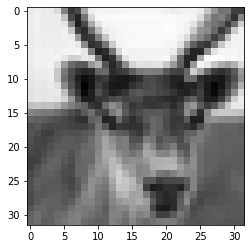

In [6]:
# Segunda imagen segundo canal
plt.imshow(images[1][2],cmap='gray')
plt.show()

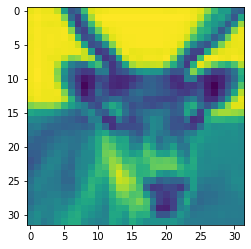

In [7]:
# Segunda imagen segundo canal
plt.imshow(images[1][1])
plt.show()

In [8]:
images[1].shape

torch.Size([3, 32, 32])

In [9]:
size_after_cov(W=32, F=5,P=0,S=1)

28.0

In [10]:
# Understanding
conv1=nn.Conv2d(3,6,5) # 3 # of channels in input   # 6  # number of channels in the output (next layer) # 5 # size of the kernel or receiptive field
print(images.shape)
# 4 imagenes, 3 canales cada imagen, cada una de de dimension 28x28
x=conv1(images)
print(x.shape)
pool=nn.MaxPool2d(2,2)  # Reduce size by factor 2
x=pool(x)
print(x.shape)
print(size_after_cov(W=14, F=5,P=0,S=1))
conv2=nn.Conv2d(6,16,5)
x=conv2(x)
print(x.shape)
x=pool(x)
print(x.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
10.0
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [11]:
x=x.view(-1,16*5*5)
fc1=nn.Linear(16*5*5,120) # Resize of convolutions
x=fc1(x)
print(x.shape)
fc2=nn.Linear(120,84)
x=fc2(x)
print(x.shape)
fc3=nn.Linear(84,10)
x=fc3(x)
print(x.shape)

torch.Size([4, 120])
torch.Size([4, 84])
torch.Size([4, 10])


In [12]:
# Implement conv net
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x



In [13]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Epoch [1/5], Step [2000/12500], Loss: 2.2597
Epoch [1/5], Step [4000/12500], Loss: 2.2599
Epoch [1/5], Step [6000/12500], Loss: 2.3133
Epoch [1/5], Step [8000/12500], Loss: 2.3327
Epoch [1/5], Step [10000/12500], Loss: 2.0261
Epoch [1/5], Step [12000/12500], Loss: 2.2534
Epoch [2/5], Step [2000/12500], Loss: 2.0184
Epoch [2/5], Step [4000/12500], Loss: 1.7595
Epoch [2/5], Step [6000/12500], Loss: 1.8629
Epoch [2/5], Step [8000/12500], Loss: 1.6918
Epoch [2/5], Step [10000/12500], Loss: 1.3817
Epoch [2/5], Step [12000/12500], Loss: 1.3404
Epoch [3/5], Step [2000/12500], Loss: 1.4511
Epoch [3/5], Step [4000/12500], Loss: 1.2307
Epoch [3/5], Step [6000/12500], Loss: 1.8414
Epoch [3/5], Step [8000/12500], Loss: 1.3575
Epoch [3/5], Step [10000/12500], Loss: 2.3980
Epoch [3/5], Step [12000/12500], Loss: 1.6937
Epoch [4/5], Step [2000/12500], Loss: 1.6054
Epoch [4/5], Step [4000/12500], Loss: 1.5785
Epoch [4/5], Step [6000/12500], Loss: 2.2031
Epoch [4/5], Step [8000/12500], Loss: 2.1546
Epoc